In [48]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib.pyplot as plt
import collections
from tqdm import tqdm
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    Trainer,
    TrainingArguments
)

In [49]:
def plot(train_losses, validation_losses, em):
    global epochs
    plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
    plt.plot(range(1, epochs + 1), validation_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training & Validation Loss")
    plt.savefig("loss.png")

    plt.plot(range(1, epochs + 1), em, label="em score")
    plt.xlabel("Epochs")
    plt.ylabel("em")
    plt.legend()
    plt.savefig("em.png")

def get_best_ans( answers):
    if answers != []:
        maxi = answers[0]["logit_score"]
        maxi_ans = answers[0]["ans"]
        for i in answers:
            if i["logit_score"] > maxi:
                maxi = i["logit_score"]
                maxi_ans = i["ans"]
        return maxi_ans
    return ""


def initialize_tokenizer(tokeniser, text, maxlen, stride):
    normalised_ques = []
    for _ in text["question"]:
        normalised_ques.append(_.strip().lower())

    normalised_context = []
    for _ in text["context"]:
        normalised_context.append(_.strip().lower())

    inputs = tokeniser(
        normalised_ques,
        normalised_context,
        truncation="only_second",
        max_length=maxlen,
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length"
    )
    return inputs
def is_valid_span(start, end, offsets, max_answer_length):
    if offsets[start] is None or offsets[end] is None:
        # print("abcd1")
        return False
    if end < start or (end - start + 1) > max_answer_length:
        # print("ab/cd2")
        return False
    return True

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_52002/20993987.py:311: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Exact Match
1,1.938200,2.188898,32.788680


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 866.84it/s]

EM score:  32.78868019877032


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 865.23it/s]


EM score:  32.78868019877032
Epoch 1:
  - Train Loss = 3.1595366051007514
  - Eval Loss = 2.1888980865478516
  - EM Score = 32.79%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.470800,1.983756,35.498442


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 869.87it/s]

EM score:  35.498441842836684


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 869.47it/s]


EM score:  35.498441842836684
Epoch 2:
  - Train Loss = 1.5976942752694485
  - Eval Loss = 1.9837557077407837
  - EM Score = 35.50%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.320000,1.996746,36.557399


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 865.70it/s]

EM score:  36.55739914090794


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 865.97it/s]


EM score:  36.55739914090794
Epoch 3:
  - Train Loss = 1.1808254090313133
  - Eval Loss = 1.9967459440231323
  - EM Score = 36.56%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.334800,2.036200,38.709004


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 866.49it/s]

EM score:  38.709003621662596


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 856.87it/s]


EM score:  38.709003621662596
Epoch 4:
  - Train Loss = 0.970500667224868
  - Eval Loss = 2.0362002849578857
  - EM Score = 38.71%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.268500,2.029939,38.843763


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:15<00:00, 777.53it/s]

EM score:  38.84376316011117


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:14<00:00, 844.89it/s]


EM score:  38.84376316011117
Epoch 5:
  - Train Loss = 0.8446808669357619
  - Eval Loss = 2.0299386978149414
  - EM Score = 38.84%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.233900,2.088708,34.776383


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 876.07it/s]

EM score:  39.776383390886885


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 865.42it/s]


EM score:  39.776383390886885
Epoch 6:
  - Train Loss = 0.75875442596659
  - Eval Loss = 2.088707685470581
  - EM Score = 39.78%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.345800,2.149595,40.607934


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 849.35it/s]

EM score:  40.60793396782616


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 868.79it/s]


EM score:  40.60793396782616
Epoch 7:
  - Train Loss = 0.6972055138404399
  - Eval Loss = 2.14959454536438
  - EM Score = 40.61%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.474800,2.260197,40.186810


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 862.45it/s]


EM score:  40.186810410174346


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 860.95it/s]


EM score:  40.186810410174346
Epoch 8:
  - Train Loss = 0.6572379220479702
  - Eval Loss = 2.260197401046753
  - EM Score = 40.19%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.421900,2.308518,40.043628


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 859.10it/s]

EM score:  40.04362840057273


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 879.67it/s]


EM score:  40.04362840057273
Epoch 9:
  - Train Loss = 0.6214063394518576
  - Eval Loss = 2.308518171310425
  - EM Score = 40.04%


Epoch,Training Loss,Validation Loss,Exact Match
1,1.323300,2.300493,40.431062


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 876.15it/s]


EM score:  40.431062073612395


Finding EM score 

--------------------------------------


100%|██████████| 11873/11873 [00:13<00:00, 872.65it/s]


EM score:  40.431062073612395
Epoch 10:
  - Train Loss = 0.5911220227325312
  - Eval Loss = 2.300493001937866
  - EM Score = 40.43%


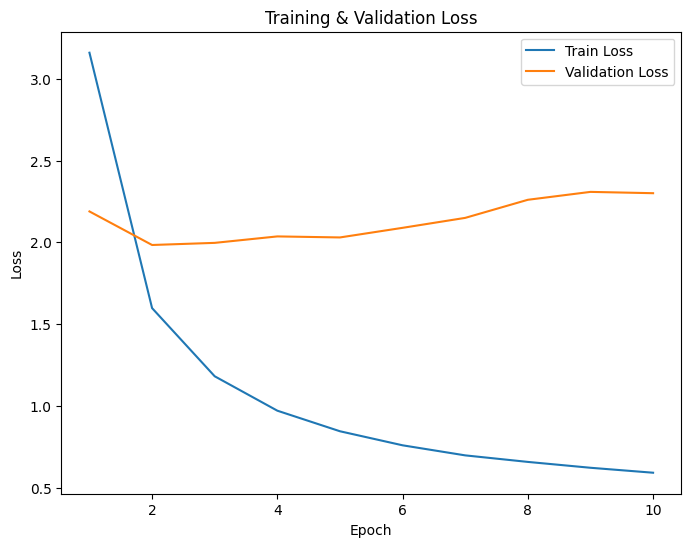

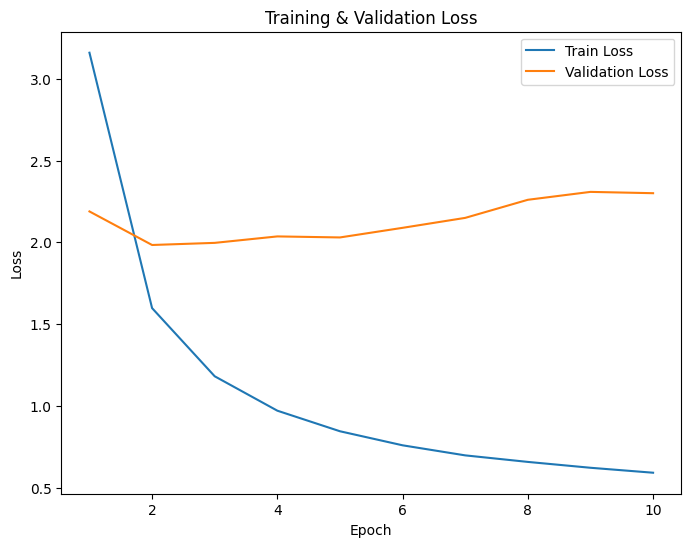

In [2]:
#%%
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib.pyplot as plt
import collections
from tqdm import tqdm
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    Trainer,
    TrainingArguments
)
# os.environ["CUDA_VISIBLE_DEVICES"] = "6"
def plot(train_losses, validation_losses, em):
    global epochs
    plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
    plt.plot(range(1, epochs + 1), validation_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training & Validation Loss")
    plt.savefig("loss.png")

    plt.plot(range(1, epochs + 1), em, label="em score")
    plt.xlabel("Epochs")
    plt.ylabel("em")
    plt.legend()
    plt.savefig("em.png")

def get_best_ans( answers):
    if answers != []:
        maxi = answers[0]["logit_score"]
        maxi_ans = answers[0]["ans"]
        for i in answers:
            if i["logit_score"] > maxi:
                maxi = i["logit_score"]
                maxi_ans = i["ans"]
        return maxi_ans
    return ""

def initialize_tokenizer(tokeniser, text, maxlen, stride):
    normalised_ques = []
    for _ in text["question"]:
        normalised_ques.append(_.strip().lower())

    normalised_context = []
    for _ in text["context"]:
        normalised_context.append(_.strip().lower())

    inputs = tokeniser(
        normalised_ques,
        normalised_context,
        truncation="only_second",
        max_length=maxlen,
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length"
    )
    return inputs
def is_valid_span(start, end, offsets, max_answer_length):
    if offsets[start] is None or offsets[end] is None:
        # print("abcd1")
        return False
    if end < start or (end - start + 1) > max_answer_length:
        # print("ab/cd2")
        return False
    return True
def lowercase_example(example):
    example["question"] = example["question"].lower()
    example["context"] = example["context"].lower()
    # Lowercase each answer text. The answer_start remains unchanged because lowercasing preserves string length.
    example["answers"]["text"] = [ans.lower() for ans in example["answers"]["text"]]
    return example

def init_weights(module):
    if isinstance(module, (torch.nn.Linear, torch.nn.Embedding)):
        torch.nn.init.xavier_uniform_(module.weight)
    if isinstance(module, torch.nn.Linear) and module.bias is not None:
        torch.nn.init.zeros_(module.bias)

def exact_match_score(predictions, references):
    """
    Compute the exact match score.
    Here, predictions is a list of strings and references is a list of lists of strings.
    A prediction is considered correct if it exactly matches any of the reference answers.
    """
    matches = 0
    for pred, ref_list in zip(predictions, references):
        # Check if prediction matches any of the reference answers (after stripping whitespace)
        if any(pred.strip() == ref.strip() for ref in ref_list):
            matches += 1
    return matches / len(references) * 100  # Convert to percentage

class SpanBERT1:
    def __init__(self, max_length=384, doc_stride=128):
        self.dataset = load_dataset("squad_v2")
        self.dataset["train"] = self.dataset["train"].select(range(15000))
        self.dataset["validation"] = self.dataset["validation"]
        self.dataset["train"] = self.dataset["train"].map(lowercase_example)
        self.dataset["validation"] = self.dataset["validation"].map(lowercase_example)
        self.validation_examples = self.dataset["validation"]

        self.tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")  # or "bert-base-uncased"
        self.model = AutoModelForQuestionAnswering.from_pretrained("SpanBERT/spanbert-base-cased")
        self.max_length = max_length
        self.doc_stride = doc_stride

    def preprocess_training_examples(self, text):
        # print(text)
        inputs = initialize_tokenizer(self.tokenizer, text, self.max_length, self.doc_stride)

        overflow_to_sample_mapping, offset_mapping = inputs.pop("overflow_to_sample_mapping"), inputs.pop("offset_mapping")
        CLS_token =  self.tokenizer.cls_token_id
        start_positions, end_positions = [],[]

        for index, offsets in enumerate(offset_mapping):
            sample_index = overflow_to_sample_mapping[index]
            answers = text["answers"][sample_index]
            # print(inputs["input_ids"])

            cls_index = inputs["input_ids"][index].index(CLS_token)

            if len(answers["answer_start"]) == 0:
                start_positions, end_positions = self.no_answer(start_positions, end_positions, cls_index)
            else:
                start_char = answers["answer_start"][0]
                end_char = answers["answer_start"][0] + len(answers["text"][0])
                sequence_ids = inputs.sequence_ids(index)

                context_start = sequence_ids.index(1)

                context_end = None
                for i in range(len(sequence_ids) - 1, -1, -1):
                    if sequence_ids[i] == 1:
                        context_end = i
                        break

                # TODO: maybe fix this
                if offsets[context_start][0] > start_char or offsets[context_end - 1][1] < end_char:
                    start_positions, end_positions = self.no_answer(start_positions, end_positions, cls_index)
                else:
                    token_start_index = context_start
                    for i in range(context_start, context_end):
                        if offsets[i][0] > start_char:
                            break
                        token_start_index = i

                    for i in range(context_end - 1, context_start - 1, -1):
                        if offsets[i][1] < end_char:
                            token_end_index = i + 1
                            break
                    else:
                        token_end_index = context_start

                    start_positions.append(token_start_index)
                    end_positions.append(token_end_index)

        inputs["start_positions"], inputs["end_positions"] = start_positions, end_positions
        return inputs
    def no_answer(self, start_positions,end_positions, cls_token):
        start_positions.append(0)
        end_positions.append(0)
        return start_positions, end_positions
    def preprocess_validation_examples(self, text):

        inputs = initialize_tokenizer(self.tokenizer, text, self.max_length, self.doc_stride)

        overflow_to_sample_mapping, offset_mapping = inputs.pop("overflow_to_sample_mapping"), inputs["offset_mapping"]
        CLS_token =  self.tokenizer.cls_token_id
        start_positions, end_positions, example_ids, contexts, answer_list = [],[], [], [], []

        for index, offsets in enumerate(offset_mapping):
            sample_index = overflow_to_sample_mapping[index]
            example_ids.append(text["id"][sample_index])
            contexts.append(text["context"][sample_index])
            answer_list.append(text["answers"][sample_index])
            answers = text["answers"][sample_index]
            cls_index = inputs["input_ids"][index].index(CLS_token)

            if len(answers["answer_start"]) == 0:
                start_positions, end_positions = self.no_answer(start_positions, end_positions, cls_index)
            else:
                start_char = answers["answer_start"][0]
                end_char = answers["answer_start"][0] + len(answers["text"][0])
                sequence_ids = inputs.sequence_ids(index)

                context_start = sequence_ids.index(1)

                context_end = None
                for i in range(len(sequence_ids) - 1, -1, -1):
                    if sequence_ids[i] == 1:
                        context_end = i
                        break

                if offsets[context_start][0] > start_char or offsets[context_end][1] < end_char:
                    start_positions, end_positions = self.no_answer(start_positions, end_positions, cls_index)
                else:
                    token_start_index = context_start
                    for i in range(context_start, context_end):
                        if offsets[i][0] > start_char:
                            break
                        token_start_index = i

                    for i in range(context_end - 1, context_start - 1, -1):
                        if offsets[i][1] < end_char:
                            token_end_index = i + 1
                            break
                    else:
                        token_end_index = context_start

                    start_positions.append(token_start_index)
                    end_positions.append(token_end_index)

            sequence_ids = inputs.sequence_ids(index)
            inputs["offset_mapping"][index] = [o if sequence_ids[k] == 1 else None for k, o in enumerate(offsets)]

        inputs["example_id"] = example_ids
        inputs["start_positions"], inputs["end_positions"] = start_positions, end_positions
        inputs["context"] = contexts
        inputs["answers"] = answer_list
        return inputs

    def tokenize_dataset(self):
        train_dataset = self.dataset["train"].map(
            self.preprocess_training_examples,
            batched=True,
            remove_columns=self.dataset["train"].column_names
        )
        validation_dataset = self.dataset["validation"].map(
            self.preprocess_validation_examples,
            batched=True,
            remove_columns=self.dataset["validation"].column_names
        )
        # Store the tokenized validation features for later metric computation
        self.validation_features = validation_dataset
        return train_dataset, validation_dataset

    def get_row_to_feature_map(self):
        row_to_features = {}

        for idx, feature in enumerate(self.validation_features):
            if feature["example_id"] not in row_to_features:
                row_to_features[feature["example_id"]] = []

            row_to_features[feature["example_id"]].append(idx)
        return row_to_features

    def compute_metrics(self, eval_pred):

        print("Finding EM score \n")
        print("--------------------------------------")
        n, max_answer_length, example_to_features = 30, 40, self.get_row_to_feature_map()
        answers = []

        predicted_answers ,true_answers= [], []

        for row in tqdm(self.validation_examples):
            row_index, context = row["id"], row["context"]
            answers = []

            for feature_index in example_to_features[row_index]:
                feature = self.validation_features[feature_index]
                offsets = feature["offset_mapping"]
                start_logits ,end_logits = eval_pred.predictions[0][feature_index], eval_pred.predictions[1][feature_index]

                start = np.argsort(start_logits)[::-1][:n].tolist()
                end = np.argsort(end_logits)[::-1][:n].tolist()

                for s_idx in start:
                    for e_idx in end:
                        if not is_valid_span(s_idx, e_idx, offsets, max_answer_length):
                            continue
                        answers.append({"ans": context[offsets[s_idx][0]: offsets[e_idx][1]], "logit_score": start_logits[s_idx] + end_logits[e_idx]})


            predicted_answers.append(get_best_ans(answers))

            if row["answers"]["text"]:
                true_answers.append(row["answers"]["text"])
            else:
                true_answers.append([""])

        em = exact_match_score(predicted_answers, true_answers)
        print("EM score: ", em)
        return {"eval_exact_match": em}
    def initialize_model(self, train_dataset, validation_dataset):
        training_args = TrainingArguments(
            output_dir="./results1",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=4e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=1,
            warmup_steps=500,
            logging_steps=10,
            save_total_limit=1,
            load_best_model_at_end=True,
            metric_for_best_model="eval_exact_match",
            greater_is_better=True,
        )

        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=validation_dataset,
            tokenizer=self.tokenizer,
            compute_metrics=self.compute_metrics,
        )

        return trainer

    def fit(self, trainer):
        train_losses = []
        eval_losses = []
        em_scores = []

        # Training loop for the specified number of epochs
        for epoch in range(10):
            train_result = trainer.train()
            train_loss = train_result.metrics["train_loss"]
            train_losses.append(train_loss)

            eval_result = trainer.evaluate()
            eval_loss = eval_result.get("eval_loss", None)
            eval_losses.append(eval_loss)
            em_score = eval_result.get("eval_exact_match", None)
            em_scores.append(em_score)

            print(f"Epoch {epoch + 1}:")
            print(f"  - Train Loss = {train_loss}")
            print(f"  - Eval Loss = {eval_loss}")
            print(f"  - EM Score = {em_score:.2f}%")

        # Save the trained model
        trainer.save_model("./base_model_checkpoint2")

        # Plot the training and validation loss curves
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
        plt.plot(range(1, len(eval_losses) + 1), eval_losses, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Training & Validation Loss")
        plt.savefig("a2.png")

        # Plot the EM score per epoch
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(em_scores) + 1), em_scores, marker="o", label="Exact Match (EM) Score")
        plt.xlabel("Epoch")
        plt.ylabel("Exact Match Score (%)")
        plt.legend()
        plt.title("Exact Match Score Over Epochs")
        plt.savefig("a1.png")

        return train_losses, eval_losses, em_scores

# Instantiate and run
spanbert = SpanBERT1()
train_dataset, validation_dataset = spanbert.tokenize_dataset()
trainer = spanbert.initialize_model(train_dataset, validation_dataset)
train_losses, eval_losses, em_scores = spanbert.fit(trainer)
